In [2]:
(require '[acausal.core :as a
           :refer [defmodel model identify identifiable? q latent-projection]]
         '[clojure.repl :refer [doc]]
         '[incanter.charts]
         :reload-all)

In [69]:
(def N 1000)

(def num-vars
    "Number of variables per model."
    15)

(def num-latent
    "Number of non-observable variables per model."
    10)

(def v
    "Variables of the models"
    (a/gen-nodes num-vars))

v

[:n_1 :n_2 :n_3 :n_4 :n_5 :n_6 :n_7 :n_8 :n_9 :n_10 :n_11 :n_12 :n_13 :n_14 :n_15]

In [3]:
(defn gen-markovian
    [num-models num-vars p-edge]
    (take num-models
          (repeatedly #(a/erdos-renyi-model num-vars p-edge))))

#'user/gen-markovian

In [4]:
(defn gen-models
    [num-models num-vars num-latent p-edge]
    (let [models (gen-markovian num-models num-vars p-edge)]
        (for [m models]
            (a/latent-projection m (take num-latent (shuffle (a/verticies m)))))))

#'user/gen-models

In [5]:
(defn erdos-reyni-number [num-vars]
    (/ (java.lang.Math/log num-vars) num-vars))

#'user/erdos-reyni-number

In [6]:
(defn average [coll]
    (/ (reduce + coll) (count coll)))

#'user/average

In [69]:
(erdos-reyni-number 10)

0.23025850929940458

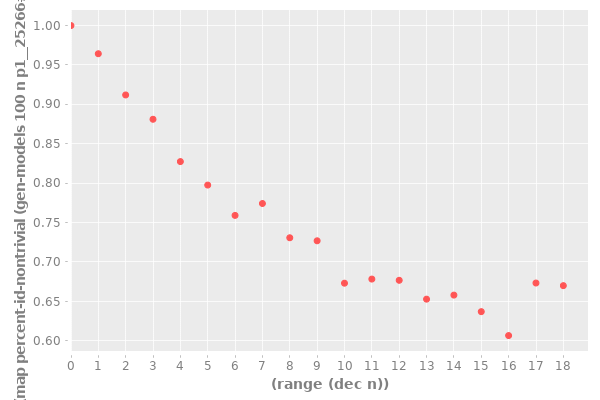

In [68]:
(let [n 20]
  (->
    (incanter.charts/scatter-plot
        (range (dec n))
        (map #(average (map percent-id-nontrivial (gen-models 100 n % 0.5))) (range (dec n))))
    
    (.createBufferedImage 600 400)))

In [95]:
(percent-identifiable (nth random-semimarkovian-models 3))

3/5

In [63]:
(average (map percent-id-nontrivial (gen-models 1000 15 13 0.5)))

327/500

In [102]:
(identifiable?
    (nth random-semimarkovian-models 3)
    (q [:n_11] :do [:n_15]))

true

In [10]:
(defn all-singleton-queries
    "All queries of the form (q i :do j) for i not= j"
    [nodes]
    (for [i nodes
          j nodes
          :when (not= i j)]
          (q [i] :do [j])))

#'user/all-singleton-queries

In [8]:
(defn nontrivial-singleton-queries
    [nodes]
    (for [i nodes
          j nodes
          :when (< (compare i j) 0)]
          (q [i] :do [j])))

#'user/nontrivial-singleton-queries

In [40]:
(defn percent-identifiable
    [m]
    (let [queries (all-singleton-queries (a/verticies m))]
        (/
            (->>
                queries
                (map #(identifiable? m %))
                (filter identity)
                count)
            (count queries))))

#'user/percent-identifiable

In [11]:
(defn percent-id-nontrivial
    [m]
    (let [queries (nontrivial-singleton-queries (a/verticies m))]
        (/
            (->>
                queries
                (map #(identifiable? m %))
                (filter identity)
                count)
            (count queries))))

#'user/percent-id-nontrivial

In [ ]:
(defn multi-query
    [nodes]
    (for [i nodes]))

In [28]:
(a/identifiable? (first random-semimarkovian-models) (a/q [:n_13] :do [:n_4]))

false

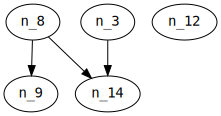

In [27]:
(first random-semimarkovian-models)